**<font color = white size=6>实验八：降维和聚类</font>**

本次实验为编写机器学习中的用于降维的PCA(主成分分析)和聚类的k-means算法。在本次实验中，我们将对一个维度过高的数据集进行降维，之后对降维后的数据进行聚类。

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import math
import matplotlib as mpl
from pandas.core.frame import DataFrame
import warnings
warnings.filterwarnings('ignore')

**<font color = blue size=4>第一部分:函数介绍</font>**

介绍一些可以用到的函数

1.计算方阵的特征值和特征向量

In [2]:
a=np.array([[1,0,0],[0,2,0],[0,0,3]])
vals,vecs=np.linalg.eig(a)
print("该矩阵的特征值:",vals)
print("该矩阵的特征向量:",vecs)

该矩阵的特征值: [1. 2. 3.]
该矩阵的特征向量: [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


2.排序函数

In [3]:
#list的排序
a=[3,1,2,4]
a.sort()
print(a)
#字典的排序
a=[3,1,2,4]
b=[[0,0,3,0],[1,0,0,0],[0,2,0,0],[0,0,0,4]]
c = [(a[i],b[i]) for i in range(len(a))]
print("未排序前:",c)
c=sorted(c)
print("排序后:",c)

[1, 2, 3, 4]
未排序前: [(3, [0, 0, 3, 0]), (1, [1, 0, 0, 0]), (2, [0, 2, 0, 0]), (4, [0, 0, 0, 4])]
排序后: [(1, [1, 0, 0, 0]), (2, [0, 2, 0, 0]), (3, [0, 0, 3, 0]), (4, [0, 0, 0, 4])]


**<font color = blue size=4>第二部分:实验任务</font>**

**<font color = green size=3>1):降维</font>**

<span style="color:purple">1.将训练集"train_data.csv"导入，训练集共有167个样本，每个样本有9个特征值，将原始数据按列组成9行167列的矩阵X</span>

In [4]:
train_data=pd.read_csv("train_data.csv")
train_data=np.array(train_data)
X=train_data.T
print(X[0:3, 0:3])

[[90.2  16.6  27.3 ]
 [10.   28.   38.4 ]
 [ 7.58  6.55  4.17]]


<span style="color:purple">2.对所有样本进行中心化，即将X的每一行减去这一行的均值</span>

In [5]:
mean=(np.mean(X, axis=1)).reshape(9,1)

print(mean)
X_cent=X-mean   #中心化
print(X_cent[0:3, 0:3])

[[3.82700599e+01]
 [4.11089760e+01]
 [6.81568862e+00]
 [4.68902150e+01]
 [1.71446886e+04]
 [7.78183234e+00]
 [7.05556886e+01]
 [2.94796407e+00]
 [1.29641557e+04]]
[[ 51.92994012 -21.67005988 -10.97005988]
 [-31.10897605 -13.10897605  -2.70897605]
 [  0.76431138  -0.26568862  -2.64568862]]


<span style="color:white">3.求出协方差矩阵$X$.$X^T$</span>

In [6]:
cov=X_cent.dot(X_cent.T)
print(cov)

[[ 2.69986170e+05 -5.83740872e+04 -3.68519056e+03 -2.06175289e+04
  -6.76675731e+07  2.04003422e+04 -5.27893716e+04  8.59899282e+03
  -5.92696868e+07]
 [-5.83740872e+04  1.24735438e+05 -1.43001259e+03  8.12322033e+04
   4.53337033e+07 -5.16095301e+03  1.28003592e+04 -2.20442541e+03
   3.49228261e+07]
 [-3.68519056e+03 -1.43001259e+03  1.25248930e+03  1.05661334e+03
   1.13903707e+06 -1.23090544e+03  8.54370096e+02 -1.35759466e+02
   2.89138322e+06]
 [-2.06175289e+04  8.12322033e+04  1.05661334e+03  9.72932969e+04
   9.48336778e+06 -1.04926771e+04  1.94390717e+03 -9.67624913e+02
   8.50750834e+06]
 [-6.76675731e+07  4.53337033e+07  1.13903707e+06  9.48336778e+06
   6.16928864e+10 -4.99828032e+06  1.74161864e+07 -2.43119084e+06
   5.25295400e+10]
 [ 2.04003422e+04 -5.16095301e+03 -1.23090544e+03 -1.04926771e+04
  -4.99828032e+06  1.85488036e+04 -3.74063824e+03  8.41870423e+02
  -7.12810999e+06]
 [-5.27893716e+04  1.28003592e+04  8.54370096e+02  1.94390717e+03
   1.74161864e+07 -3.7406382

<span style="color:white">4.对协方差矩阵$X$.$X^T$做特征值分解，即求出协方差矩阵的特征值$\vec{\lambda}=\{\lambda_1,\lambda_2,...,\lambda_d\}$及对应的特征向量$\vec{\omega}=\{\omega_1,\omega_2,...,\omega_d\}$. 其中$\lambda_i \sim \omega_i$.</span>

In [7]:
vals,vecs=np.linalg.eig(cov)
print(vals)
#print(vecs)

[1.11342747e+11 6.11653233e+09 2.07662463e+05 1.62903834e+05
 2.24346102e+04 1.21999805e+04 2.13848213e+03 1.01593379e+02
 7.03486236e+02]


<span style="color:purple">5.选取降维后的维度k：依据特征值计算方差的贡献率，先将所有特征值按照降序进行排序。要求降维后的数据方差占比超过阈值t%，公式如下. 我们这里取阈值为t%=99%:
    $$\frac{\sum_{i=1}^k\lambda_i}{\sum_{i=1}^k\lambda_i} \geq t\%$$
</span>

In [8]:
or_vals=sorted(vals,reverse=True)
print(or_vals)
num=0
for i in range(len(or_vals)):
    num+=or_vals[i]
    if num/sum(or_vals)>0.99:
        k=i+1
        break
print(k)

[111342746990.98256, 6116532333.646044, 207662.46299642485, 162903.8341571683, 22434.610243267824, 12199.980479091697, 2138.4821263009967, 703.4862363566142, 101.59337903285349]
2


<span style="color:purple">6.将特征向量按对应特征值大小从上到下按行排列，取前k个对应特征值最大的特征向量组成投影矩阵W=($\omega_1,\omega_2,...,\omega_k$)</span>

In [9]:
index=[]    #
for i in range(k):
    index.append(np.argwhere(vals==or_vals[i])[0][0])   #找到对应特征值最大的特征向量的下标

W=vecs[index]
print(W)
print(vecs[1])


[[ 8.07327698e-04 -5.57055026e-04  9.25215339e-01  3.28783999e-01
  -3.94786565e-02  6.08330796e-02  1.72243208e-01  2.86316097e-02
   1.14007614e-02]
 [-5.11348092e-04  9.41707964e-04 -2.28627282e-01  6.52814366e-01
   5.94987240e-01  4.01990656e-01 -2.82288000e-02 -9.11761529e-04
   7.18179698e-02]]
[-5.11348092e-04  9.41707964e-04 -2.28627282e-01  6.52814366e-01
  5.94987240e-01  4.01990656e-01 -2.82288000e-02 -9.11761529e-04
  7.18179698e-02]


<span style="color:purple">7.根据公式$Y=P.X$得到降维到k维后的数据集Y。

In [10]:
Y=W.dot(X_cent)
print(Y.shape)

(2, 167)


**<font color = green size=3>2):聚类</font>**

由于降维实验任务中降维后的维数符号为k，而聚类实验中聚类数目的符号也为k，为了区别，我们将聚类实验中聚类数目的符号改为$k_c$

<span style="color:purple">1.首先编写计算衡量样本间的相似度的距离，这里列举两种距离公式.</span>
    
<span style="color:purple">a.曼哈顿距离计算公式:  
    对于两个d维的样本$x_i$,$x_j$,他们的曼哈顿距离计算公式为:  
    $$dist_{man}(x_i,x_j)=\sum_{u=1}^d |x_{iu}-x_{ju}|$$
其中$x_{iu}$和$x_{ju}$分别为样本$x_i$和$x_j$的第u维特征值</span>

<span style="color:purple">b.欧式距离计算公式:  
    对于两个d维的样本$x_i$,$x_j$,他们的欧式距离计算公式为:  
    $$dist_{ed}(x_i,x_j)=\sqrt{\sum_{u=1}^d (x_{iu}-x_{ju})^2}$$
其中$x_{iu}$和$x_{ju}$分别为样本$x_i$和$x_j$的第u维特征值</span>

In [11]:
#这里选取了欧式距离
def dis(x,y):
    return np.linalg.norm((x-y))
x=np.array([1,0])
y=np.array([2,1.731])
print(dis(x,y))

1.9990900429945622


<span style="color:purple">2.确定聚类簇数$k_{c}$，然后从前面所得到的降维数据集Y中随机选取$k_{c}$个样本作为初始均值向量$\{\mu_1,\mu_2,...,\mu_{k_{c}}\}$</span>


In [17]:
k_c=7       #聚类数量，可更改
index=random.sample(range(Y.shape[1]), k_c) #随机取出k_c个来初始化
vector_0=Y.T[index]
print(vector_0)
dim=vector_0.shape      
print(dim[0])

[[ -868.40187064 21710.72080699]
 [  439.56436499 -9384.88254472]
 [  402.7419853  -9034.97223228]
 [ -293.02254099  8665.29125534]
 [   60.39839674 -2315.20531552]
 [ -504.5632155   7348.6916606 ]
 [   25.56876201 -1370.94632999]]
7


<span style="color:purple">3.开始进行迭代。每一轮更新均值向量，直到均值向量不再变化则停止迭代</span>

<span style="color:white">迭代步骤1).遍历每个样本$x_j$,计算其与当前的各个均值向量$\mu_i$的距离$d_{ji}$，比较与每个均值向量的距离大小，
   $$\lambda_j=arg min_{i \in \{1,2,...,k_{c}\}}d_{ji}$$ 
    将其划入与其距离最近的簇中。
$$C_{\lambda_j}=C_{\lambda_j}\bigcup{x_j}$$
</span>

<span style="color:white">迭代步骤2).将所有样本划分完成生成$k_{c}$个簇$\{C_1,C_2,...,C_{k_{c}}\}$。对于每个簇$C_i$，计算该簇的新均值向量，公式为:
$$\mu_i^{'}=\frac{1}{|C_i|}\sum_{x \in C_i}x$$
</span>
<span style="color:white">迭代步骤3).将更新的均值向量$\{\mu_1^{'},\mu_2^{'},...,\mu_{k_{c}}^{'}\}$与该轮未更新前的均值向量$\{\mu_1,\mu_2,...,\mu_{k_{c}}\}$进行比较.  如果完全一样，则结束迭代；如果不一样，则继续迭代.
</span>

In [19]:
epoch=20    #迭代次数

Y_=Y.T
vector_new=vector_0
dim=vector_0.shape
actual_epoch=0  #实际迭代次数
for i in range(epoch):
    #划分
    label=[]
    vector_old=vector_new
    for j in range(Y.shape[1]):      #遍历所有向量
        current_label=k_c-1     #先分为第4类
        current_vector=Y[:, j]
        mindis=dis(vector_old[current_label], current_vector) 
        for k in range(k_c-1):  #0-3，找到对应label
            if dis(vector_old[k], current_vector)<mindis:
                mindis=dis(vector_old[k], current_vector)
                current_label=k
        label.append(current_label)
    #重新计算
    vector_new=np.empty(shape=(dim[0], dim[1]))
    for j in range(k_c):
        label_index=[x for x, y in list(enumerate(label)) if y==j]  #从列表中选择满足条件的值，返回下标
        vector_index=Y[:,label_index]
        vector=vector_index.mean(axis=1)
        vector_new[j]=vector
    #判断条件
    if (vector_new==vector_old).all():  #若更新前后所有均值向量相同，则退出循环
        break
    actual_epoch+=1

print(vector_new)       #更新迭代后的均值向量
print(len(label))       #每个点的label值
print(actual_epoch)

    

[[-2069.98358942 43740.88388516]
 [  454.80417097 -9813.88559804]
 [  306.83044611 -7071.1686905 ]
 [ -673.91068995 17544.75498721]
 [  143.97235326 -4012.65798802]
 [ -353.11730205  8071.34404351]
 [  -76.09964725   533.6252004 ]]
167
5


<span style="color:purple">4.判断是否有空簇，返回所有非空的簇</span>

In [20]:
label_list=list(range(k_c))
for j in range(k_c):
    label_index=[x for x, y in list(enumerate(label)) if y==j]  #如果label中没有对应k_c中的值，说明对应的簇为空
    if len(label_index)==0:
        label_list.remove(j)    #排除空簇
print(label_list)

[0, 1, 2, 3, 4, 5, 6]


<span style="color:purple">5.所有簇划分完成后，我们引入内部指标中的DB指数对该次聚类进行评估. 公式如下:
$$DBI=\frac{1}{k_{c}}\sum_{i=1}^{k_{c}} \mathop{max}\limits_{j\neq i}\frac{avg(C_i)+avg(C_j)}{d_{cen}(C_i,C_j)}$$
其中avg(C)、$d_{cen}(C_i,C_j)$表示簇C内样本间的平均距离和簇$C_i$和簇$C_j$中心点间的距离:
$$avg(C)=\frac{2}{|C|(|C|-1)}\sum_{1\leq i\leq j \leq |C|}dist(x_i,x_j)$$
其中:
$$d_{cen}(C_i,C_j)=dist(\mu_i,\mu_j)$$
</span>

In [21]:
def avg(kc_index):
    label_index=[x for x, y in list(enumerate(label)) if y==kc_index]
    kvector=Y[:, label_index]
    sumdist=0
    modc=len(label_index)
    for i in range(modc):
        for j in range(i+1,modc):
            sumdist+=dis(kvector[:, i], kvector[:, j])
    return 2*sumdist/(modc*(modc-1))
def dcen(k_c1, k_c2):
    """ index1=[x for x, y in list(enumerate(label)) if y==k_c1]    #找到对应k_c1类的下标
    index2=[x for x, y in list(enumerate(label)) if y==k_c2]    
    vector1=Y[:, index1]    #对应k——c1类的向量
    vector2=Y[:, index2]
    vec1=vector1.mean(axis=1)
    vec2=vector2.mean(axis=1) """
    vec1=vector_new[k_c1]   #对应类别的均值向量
    vec2=vector_new[k_c2]
    return dis(vec1,vec2)   #返回均值向量的距离
sumdb=0
for i in range(k_c):
    listr=list(range(k_c))
    listr.remove(i)     #确保j！=i
    maxdb=(avg(i)+avg(listr[0]))/dcen(i, listr[0]) #初始化maxdb
    for j in listr:
        if (avg(i)+avg(j))/dcen(i,j)>maxdb:
            maxdb=(avg(i)+avg(j))/dcen(i,j)   #更新maxdb
    sumdb+=maxdb    #对maxdb求和
DBI=sumdb/k_c
print(DBI)
#DBI值为0.69,较为合理！实际分5-7类都较为合适！
    

0.6926667548458123


<span style="color:purple">6.请从降维的特征值选择其中两个作为绘图的横纵坐标，将所有样本绘制到一张图中，其中同一聚类的样本点绘制为相同颜色</span>

(2, 167)


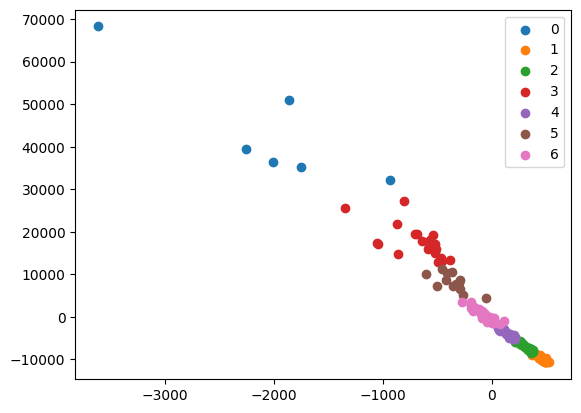

In [22]:
import matplotlib.pyplot as plt
print(Y.shape)
for i in range(k_c):    #遍历类别
    index=[x for x, y in list(enumerate(label)) if y==i]
    x=Y[0, index]
    y=Y[1, index]
    plt.scatter(x,y, label=i)   #循环画散点图时，会自动给每组数据分配不同颜色！
plt.legend()
plt.show()